<img align="left" style="padding-right:30px;" src="./tutorial/logo_UNSW.svg" height="100"><img align="left" style="padding-right:30px;" src="./tutorial/Green_RGB.png" height="90"><img align="left" style="padding-right:30px;" src="./tutorial/image004.png" height="100">



[![DOI](https://zenodo.org/badge/940091341.svg)](https://doi.org/10.5281/zenodo.14939868) <a href="https://www.globh2e.org.au/"><img src="https://img.shields.io/badge/ARC:Funding%20number-IC200100023-blue.svg"/></a>

# **<div style="text-align: left; font-size: 30px;"> Pathways to global hydrogen production within planetary boundaries**</div>
**<div style="text-align: left; font-size: 25px;"> Life cycle optimisation - Tutorial**</div>

<div style="text-align: left; font-size: 16px;">Michaël Lejeune<sup>a,b</sup>, Sami Kara<sup>a,b</sup>, Michael Zwicky Hauschild<sup>c,d</sup>, Sareh Sharabifarahni<sup>a</sup>, Rahman Daiyan<sup>b,e</sup></div><br>

<div style="text-align: left; font-size: 13px;"><sup>a</sup>Sustainability in Manufacturing and Life Cycle Engineering Research Group, School of Mechanical and Manufacturing Engineering, the University of New South Wales, 2052, Sydney, Australia</div>

<div style="text-align: left; font-size: 13px;">
<sup>b</sup>Australian Research Council Training Centre for the Global Hydrogen Economy (GlobH2e), the University of New South Wales, 2052, Sydney, Australia</div>

<div style="text-align: left; font-size: 13px;">
<sup>c</sup>Centre for Absolute Sustainability, Technical University of Denmark, Kgs, Lyngby, Denmark</div>

<div style="text-align: left; font-size: 13px;">
<sup>d</sup>Section for Quantitative Sustainability Assessment (QSA), Department of Environmental and Resource Engineering, Technical University of Denmark, Kgs, Lyngby, Denmark</div>

<div style="text-align: left; font-size: 13px;">
<sup>e</sup>School of Minerals and Energy Engineering, The University of New South Wales, Sydney 2052, Australia</div><br>


# Imports

In [1]:
using JLD2,DataFrames,Statistics, PyPlot
using Logging
global_logger(NullLogger())
include("./main/main.jl")
include("./main/utils/main_utils.jl")
include("./main/utils/ssp_utils.jl")
using .Main, .TcmUtils
⊙=.*


/Users/mickael/anaconda3/envs/ab/lib/python3.11/site-packages/scikits/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  __import__('pkg_resources').declare_namespace(__name__)


Base.Broadcast.BroadcastFunction(*)

In [3]:
years=2025:5:2050
catnames=[ # labels to match the dimensions of AESA categories.
            "Climate  change  Energy  imbalance"
            "Climate  change  CO2  Concentration"
            "Ocean  acidification"
            "Atmospheric  aerosol  loading"
            "Freshwater  use"
            "Biogeochemical  flows-P"
            "Biogeochemical  flows-N"
            "Stratospheric  ozone  depletion"
            "Land-system  change"
            "Biosphere  Integrity"]

units=["W m⁻² ","ppm","Ωarag","Aerosol optical depth","km3","TgP","TgN","Dobson units","%","%"]


10-element Vector{String}:
 "W m⁻² "
 "ppm"
 "Ωarag"
 "Aerosol optical depth"
 "km3"
 "TgP"
 "TgN"
 "Dobson units"
 "%"
 "%"

# Hydrogen production

8.334166750008334e9

In [10]:
@load "../Source data/02_results/main/Fig2/ensemble.jld";
SEʰ²=getVals("Secondary Energy|Hydrogen",df=df_h2,years=years)

EJ_to_kwh=1/3.6e-12
LHVH2=33.33 # kWh/kgH2
EJH2_to_kgH2=EJ_to_kwh/LHVH2

ṁᵏᵍ=SEʰ².*EJH2_to_kgH2 # mass H2
ṁᴹᵗ=ṁᵏᵍ.*1e-9 # convert to Mt
ṁᴳᵗ=ṁᴹᵗ.*1e-3;

ṁᴳᵗq50=median(ṁᴳᵗ,dims=1)
ṁᴹᵗq50=median(ṁᴹᵗ,dims=1)
ṁᵏᵍq50=median(ṁᵏᵍ,dims=1)

DataFrame(hcat(["GtH²","MtH²","kgH²"],vcat(ṁᴳᵗq50,ṁᴹᵗq50,ṁᵏᵍq50)),vcat("scale",string.(years)))


3×7 DataFrame
 Row │ scale  2025        2030        2035      2040        2045        2050   ⋯
     │ Any    Any         Any         Any       Any         Any         Any    ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ GtH²   0.00453504  0.0120712   0.05341   0.109736    0.158365    0.2251 ⋯
   2 │ MtH²   4.53504     12.0712     53.41     109.736     158.365     225.19
   3 │ kgH²   4.53504e9   1.20712e10  5.341e10  1.09736e11  1.58365e11  2.2519
                                                                1 column omitted

# Optimisation results

Prospective LCA results

In [11]:
s=ṁᵏᵍq50.*opti(interactions=true,
                result_format=:LCA,
                stochastic=false,
                full_biomass=false,
                full_electrolysis=false,
                full_fossil_ccs=false,
                full_renewables=true,
                dac=0, #kgCO2/kgH2
                h2_leak=0, # 0.05 = 5%
                q=0.95)
DataFrame(hcat(catnames,s,units),vcat("categories",string.(years),"units"))


10×8 DataFrame
 Row │ categories                         2025        2030        2035         ⋯
     │ Any                                Any         Any         Any          ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Climate  change  Energy  imbalan…  0.00578598  0.00963694  0.0478281    ⋯
   2 │ Climate  change  CO2  Concentrat…  0.43484     0.716099    3.56517
   3 │ Ocean  acidification               0.00132926  0.00219262  0.0109264
   4 │ Atmospheric  aerosol  loading      3.01038e-5  8.302e-5    0.000337711
   5 │ Freshwater  use                    0.153862    0.445005    1.9198       ⋯
   6 │ Biogeochemical  flows-P            0.085185    0.203907    0.762374
   7 │ Biogeochemical  flows-N            0.0122509   0.0377861   0.160474
   8 │ Stratospheric  ozone  depletion    9.50454e-6  3.28751e-5  0.000148419
   9 │ Land-system  change                1.58531e-6  5.28943e-6  2.90179e-5   ⋯
  10 │ Biosphere  Integrity               0.00296693  0.00907904  0.0433375
                                                               4 columns omitted

In [12]:
#Estimated forest use
Aᵖᵒᵗ = 6.4e13 # m² Ref Ryberg et al. 2018
land = s[9,6]*Aᵖᵒᵗ/100/1e6 # km²


57.97370148845386

# Figures

## General planetary footprint and system configurations

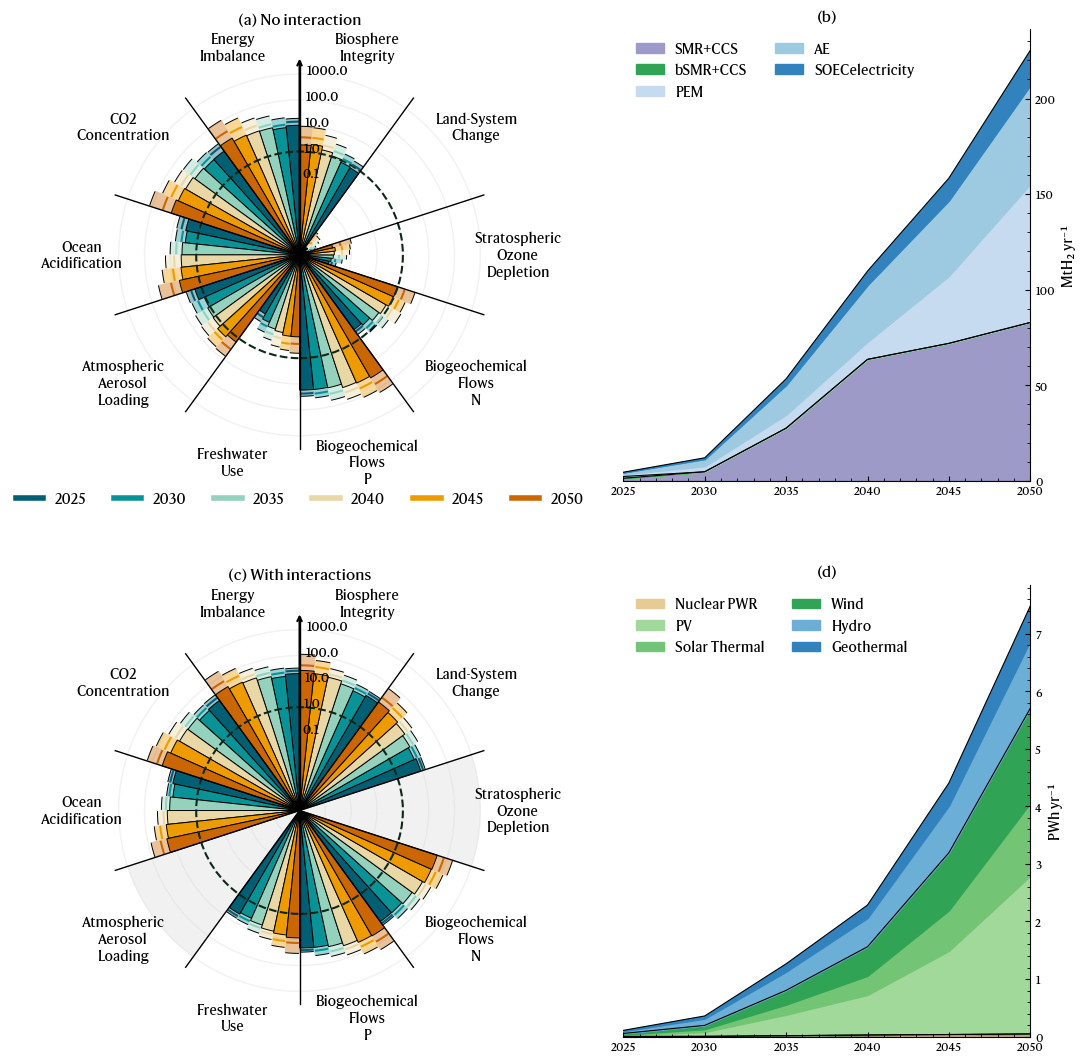

In [13]:
Fig3(samples=80,q=0.95,renewables=true,human_interact=false)


## Planetary footprint of system configurations in 2050

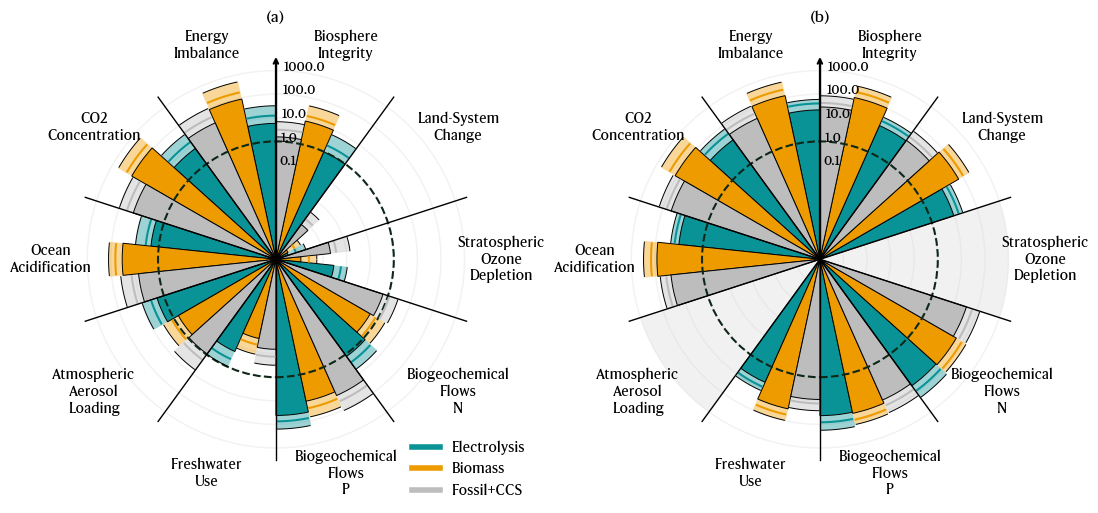

In [14]:
Fig4(samples=80,human_interact=false)


## System configurations

### Electrolytic production

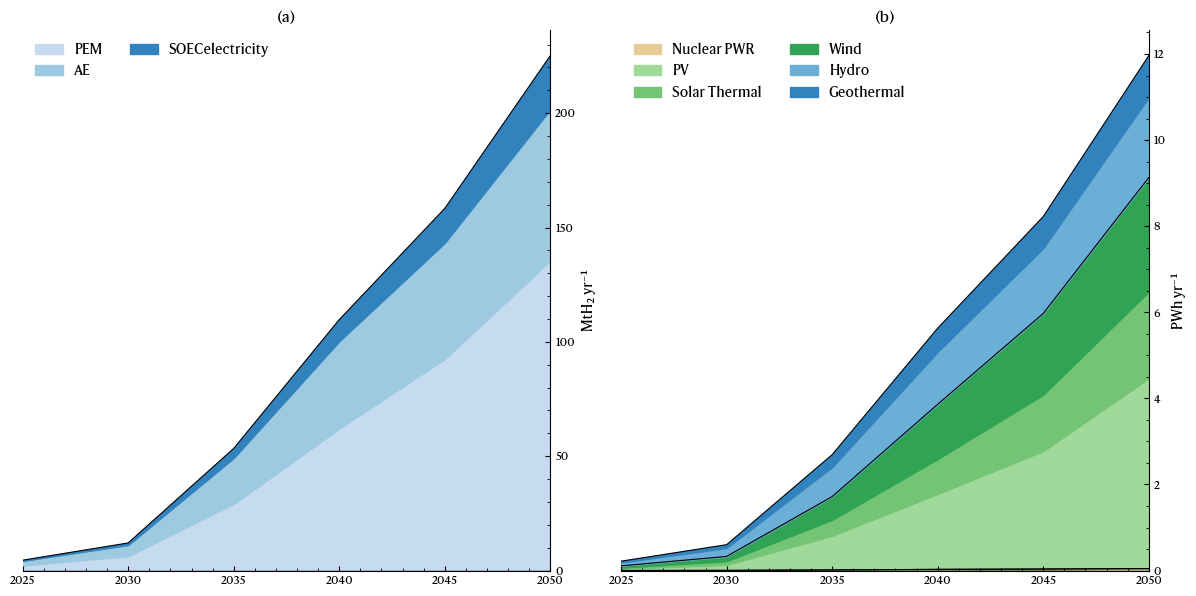

In [15]:
sysconfig(;full_biomass=false,
        full_electrolysis=true,
        full_fossil_ccs=false,
        dac=0, #kgCO2/kgH2
        h2_leak=0, # 0.05 = 5%
        )


### Bio-based production

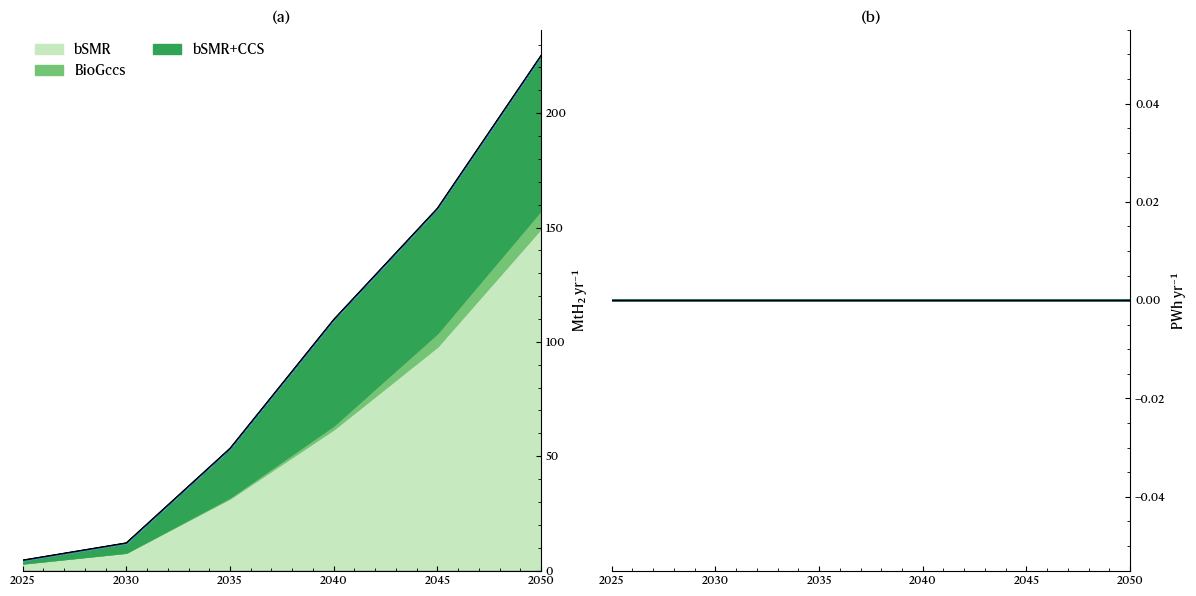

In [16]:
sysconfig(;full_biomass=true,
        full_electrolysis=false,
        full_fossil_ccs=false,
        dac=0, #kgCO2/kgH2
        h2_leak=0, # 0.05 = 5%
        )


### Fossil with CCS production

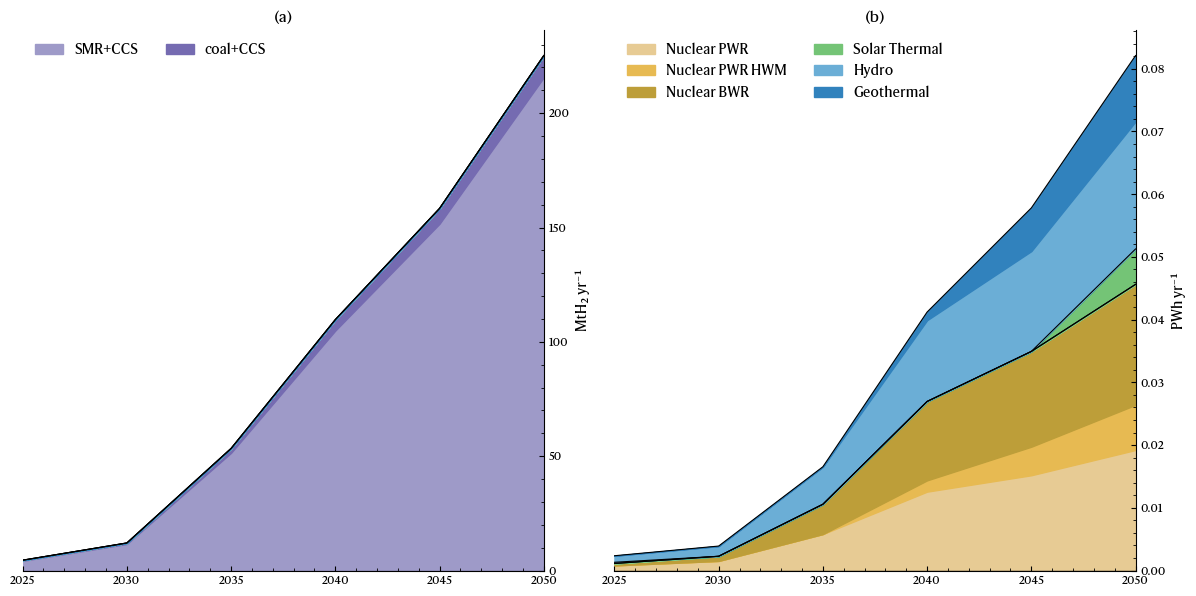

In [17]:
sysconfig(;full_biomass=false,
        full_electrolysis=false,
        full_fossil_ccs=true,
        dac=0, #kgCO2/kgH2
        h2_leak=0, # 0.05 = 5%
        )


## Contributions

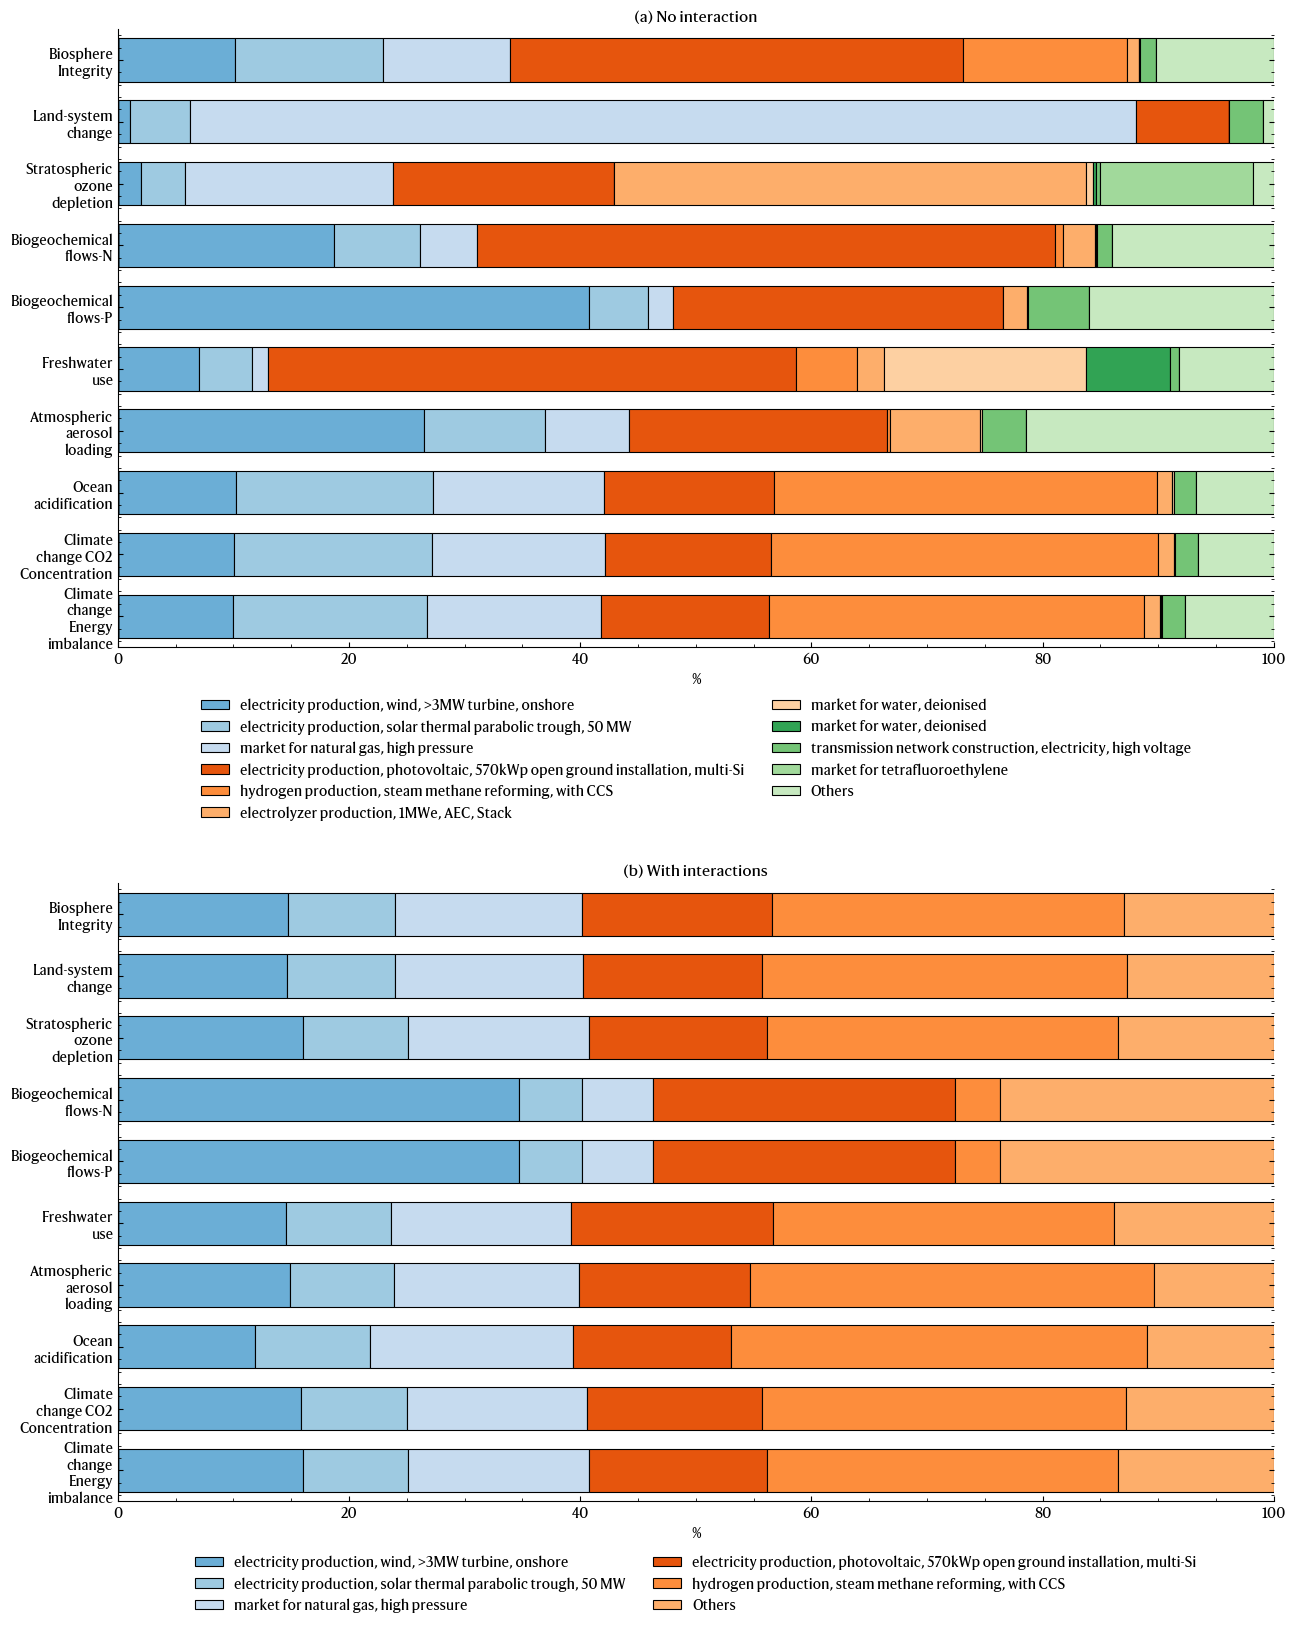

In [18]:
Fig6(full_electrolysis=false,
    full_renewables=true,
    dac=0,
    h2_leak=0,
    cutoff=5,step=2,legposa=-0.30,legposb=-0.20,q=0.95)


### Electrolytic hydrogen production

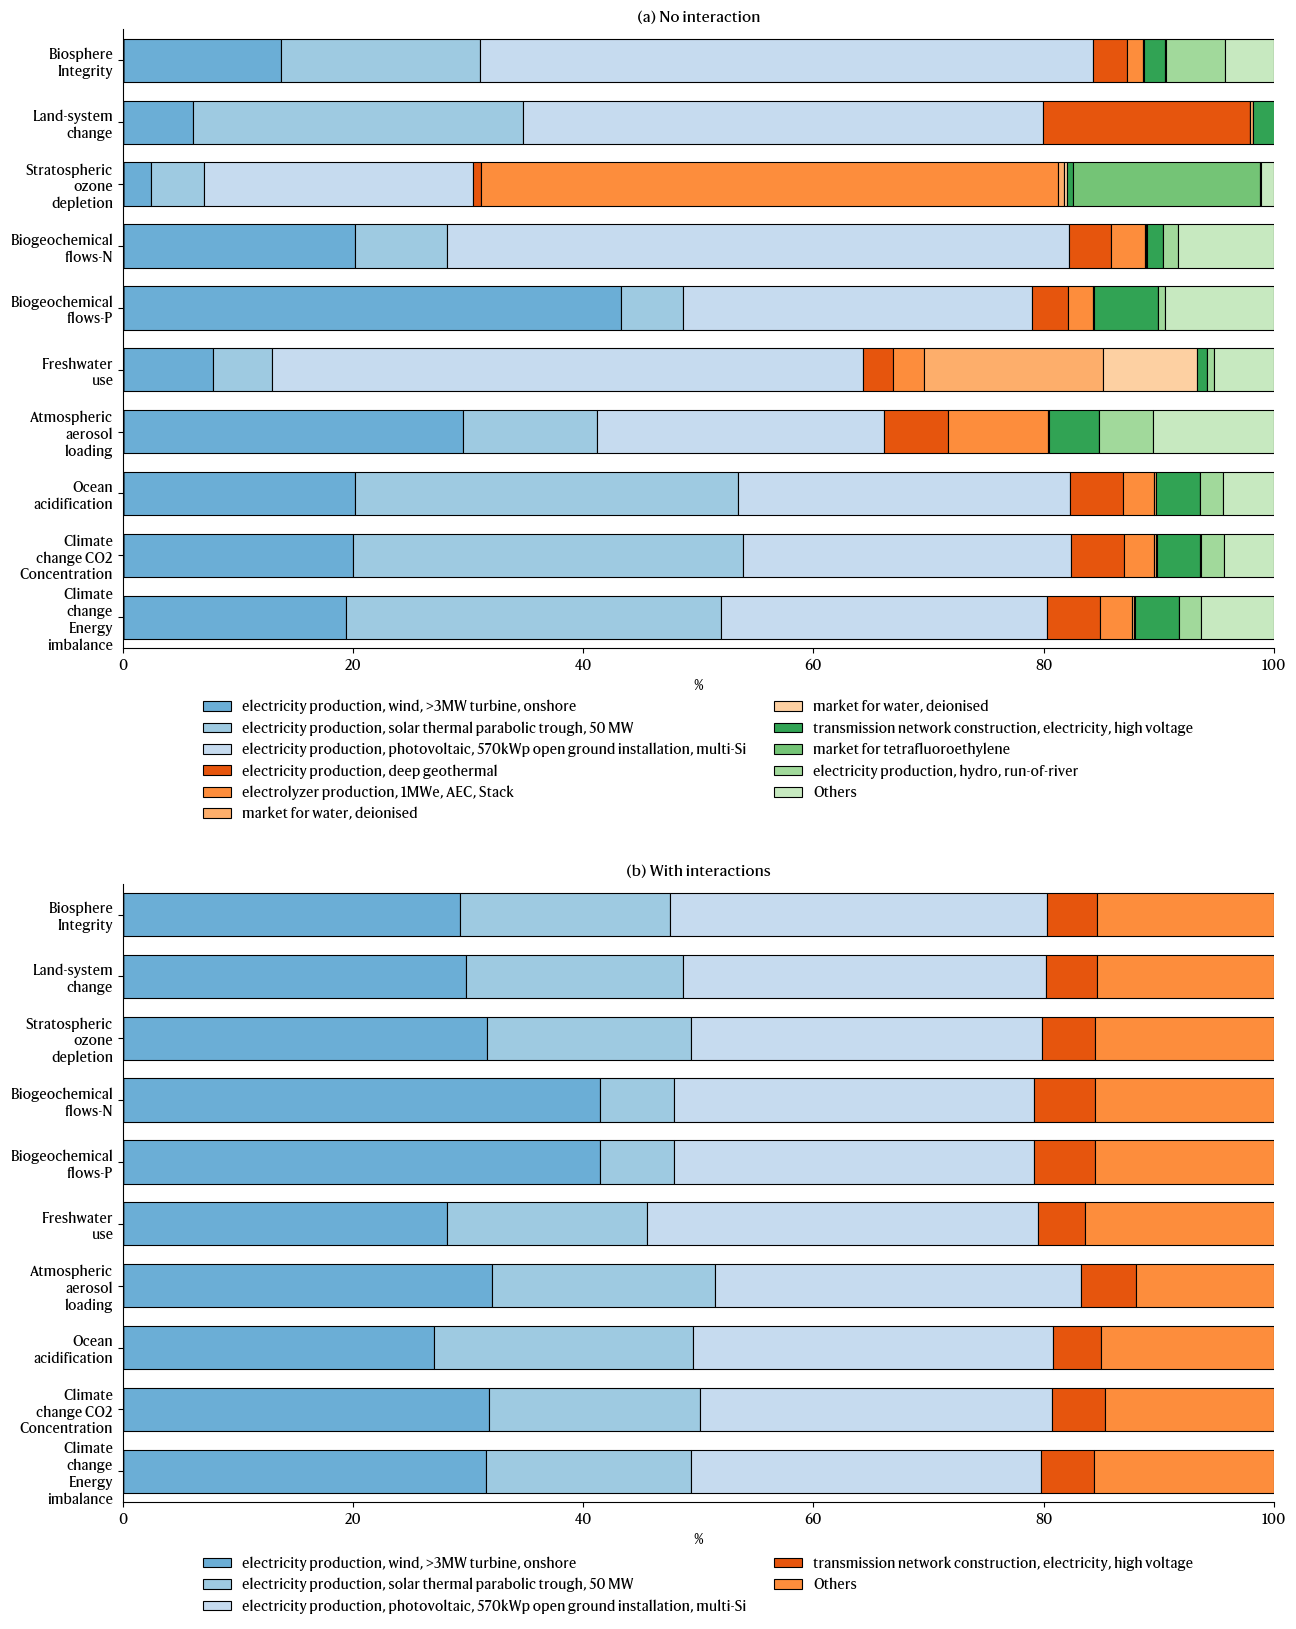

In [19]:
Fig6(full_electrolysis=true,
    full_renewables=true,
    dac=0,
    h2_leak=0,
    cutoff=5,step=2,legposa=-0.30,legposb=-0.20,q=0.95)


### Bio-based prodiction

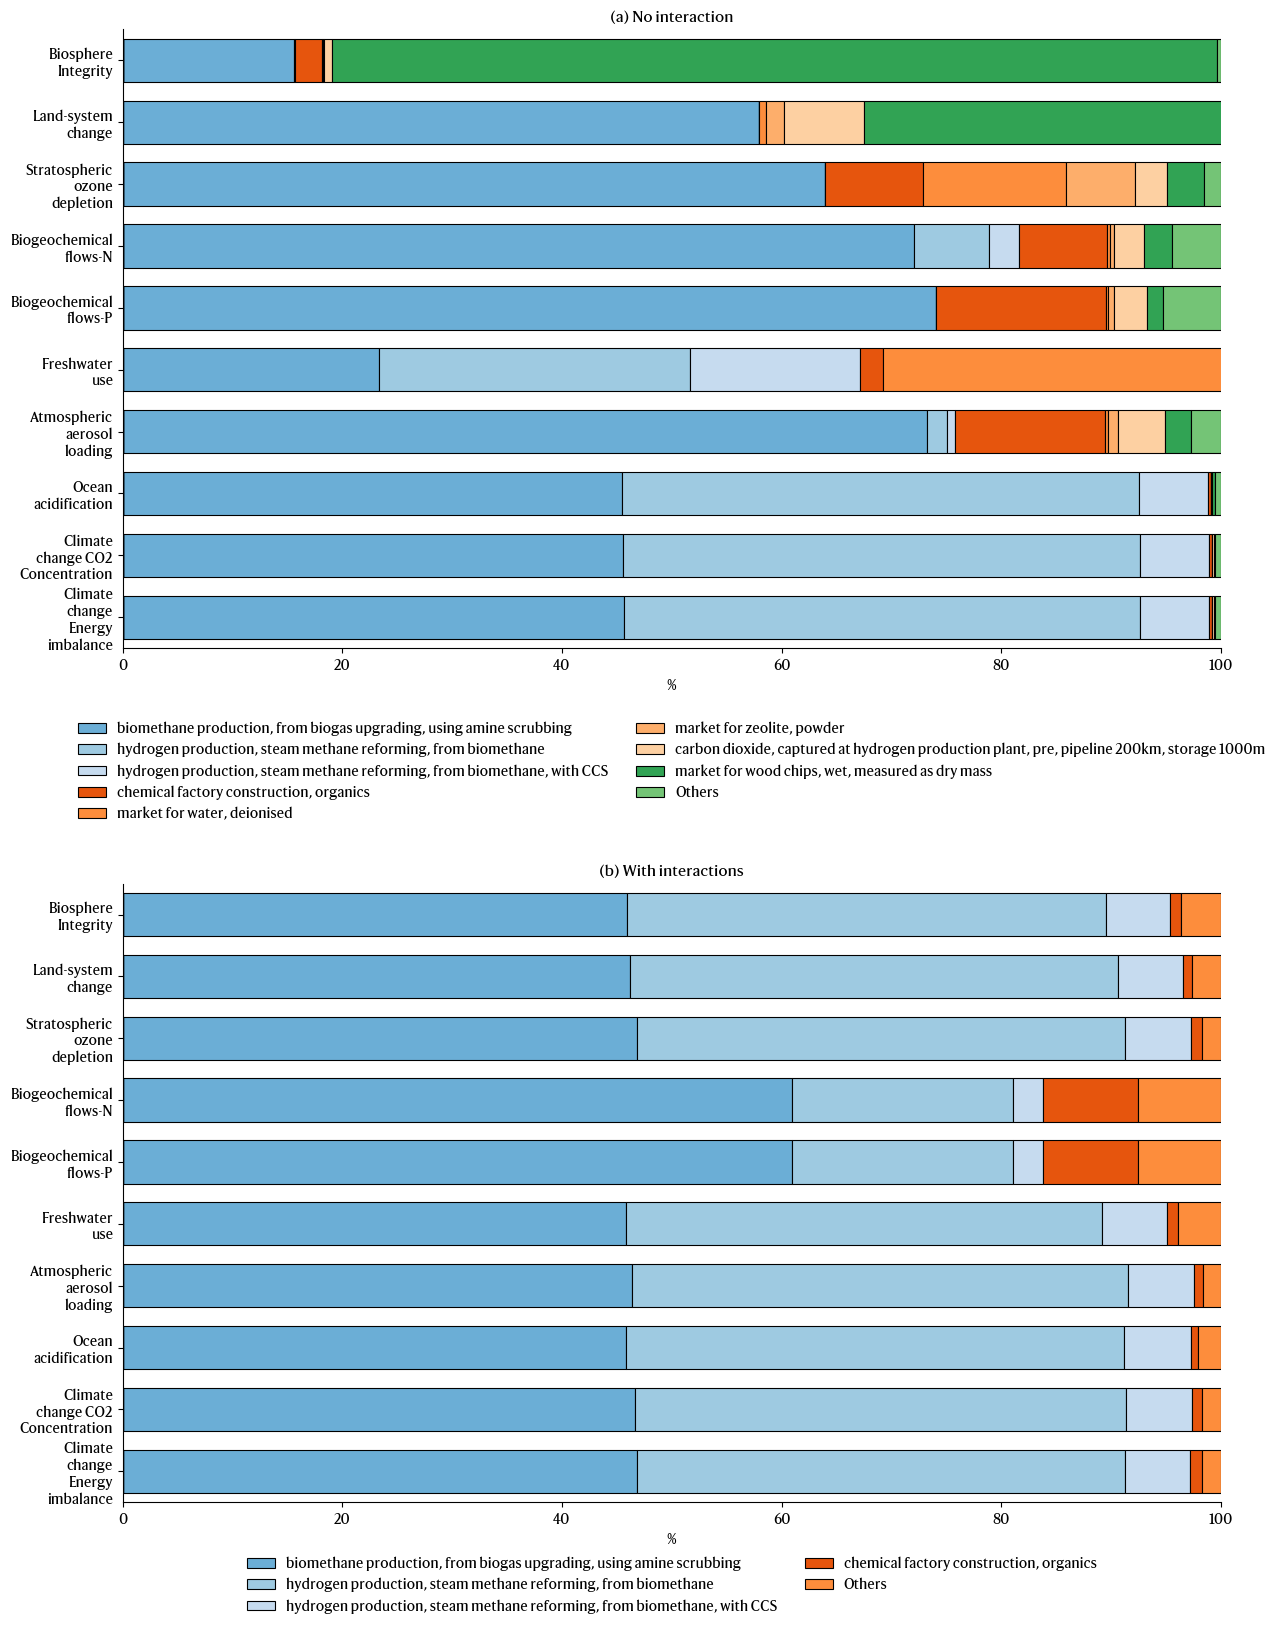

In [20]:
Fig6(full_renewables=true,
    full_biomass=true,
    dac=0,
    h2_leak=0,
    cutoff=5,step=2,legposa=-0.30,legposb=-0.20,q=0.95)


### Fossil fuel with CCS production

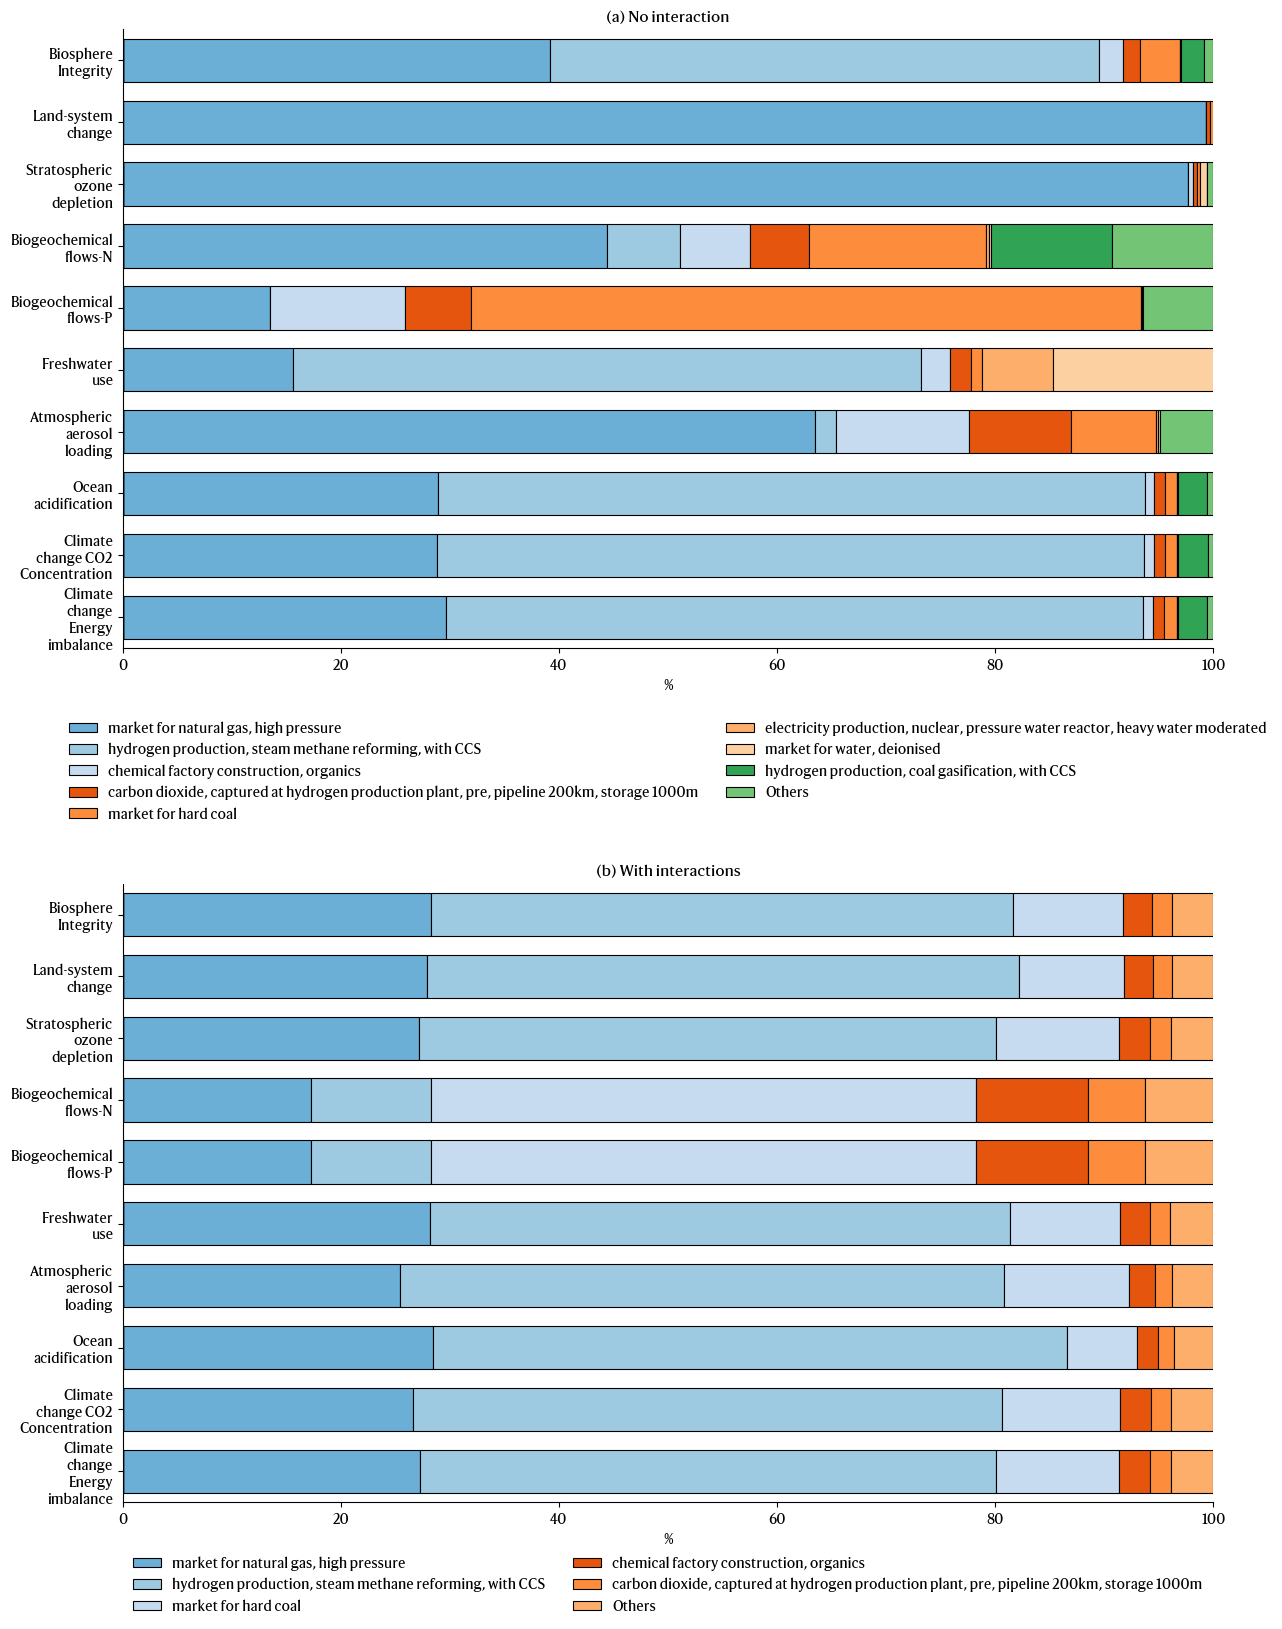

In [21]:
Fig6(full_renewables=true,
    full_fossil_ccs=true,
    dac=0,
    h2_leak=0,
    cutoff=5,step=2,legposa=-0.30,legposb=-0.20,q=0.95)


## DACS sensitivities

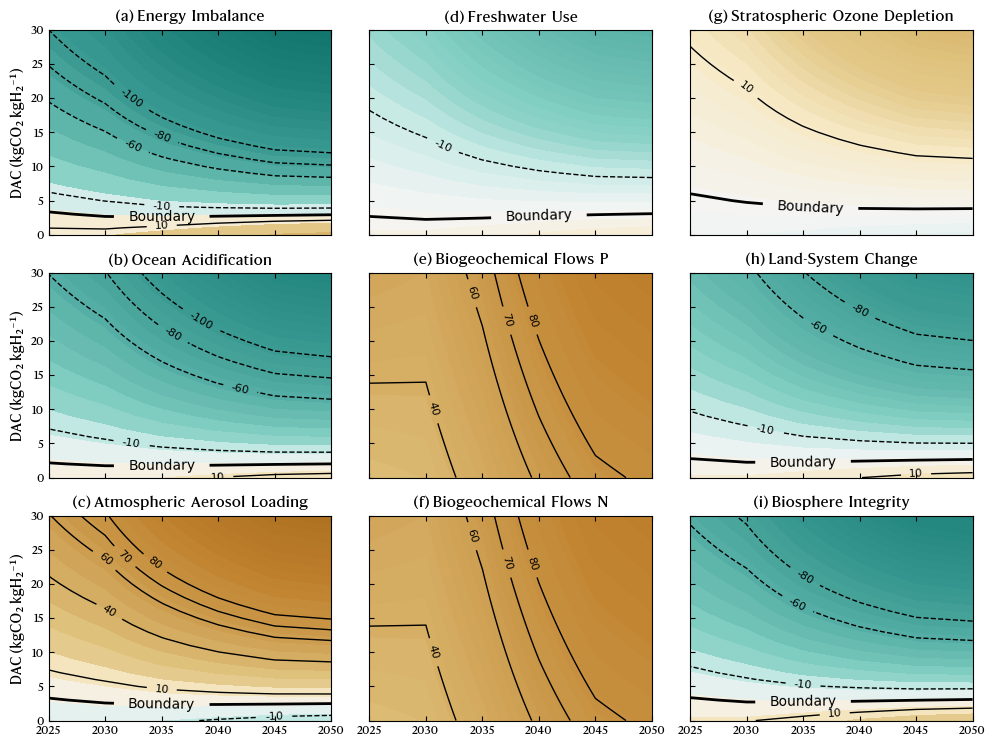

In [22]:
Fig5(interactions = true, full_electrolysis = true, full_biomass = false, full_fossil_ccs = false, q=0.95,renewables=true, human_interact=false)


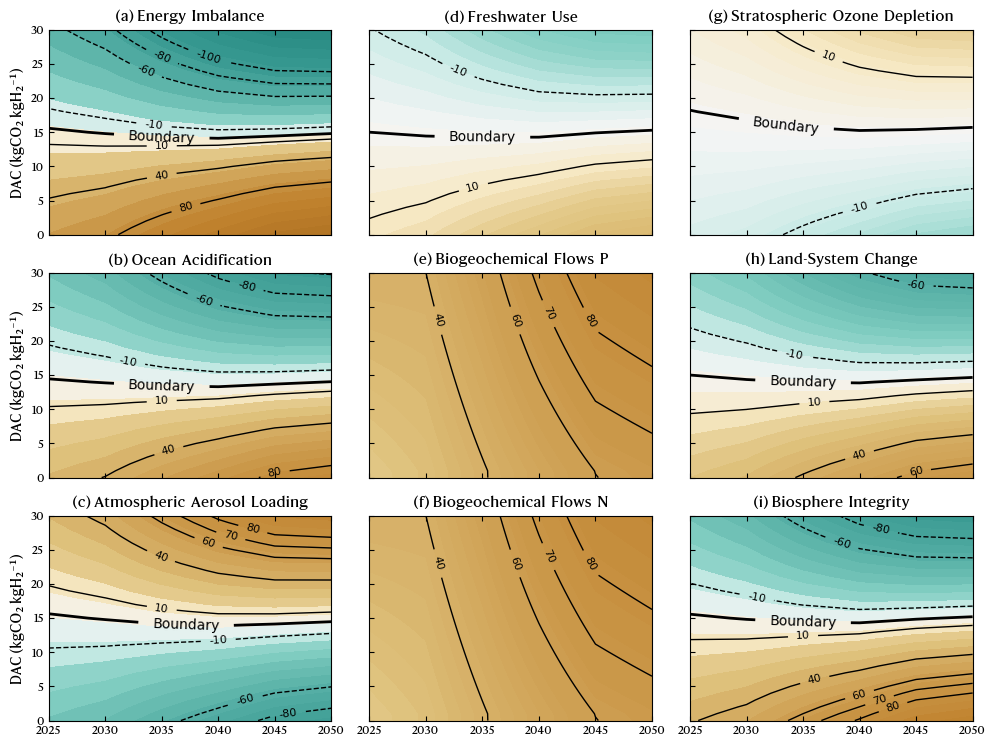

In [23]:
Fig5(interactions = true, full_electrolysis = false, full_biomass = true, full_fossil_ccs = false, q=1,renewables=true, human_interact=false)


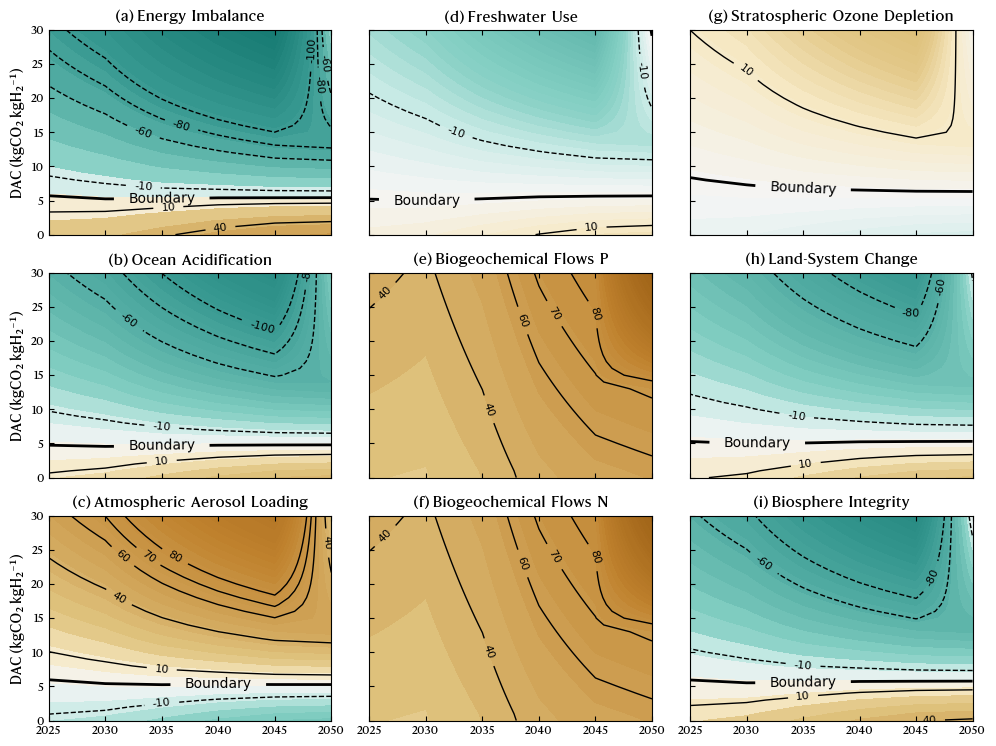

In [25]:
Fig5(interactions = true, full_electrolysis = false, full_biomass = false, full_fossil_ccs = true, q=0.95,renewables=true, human_interact=false)


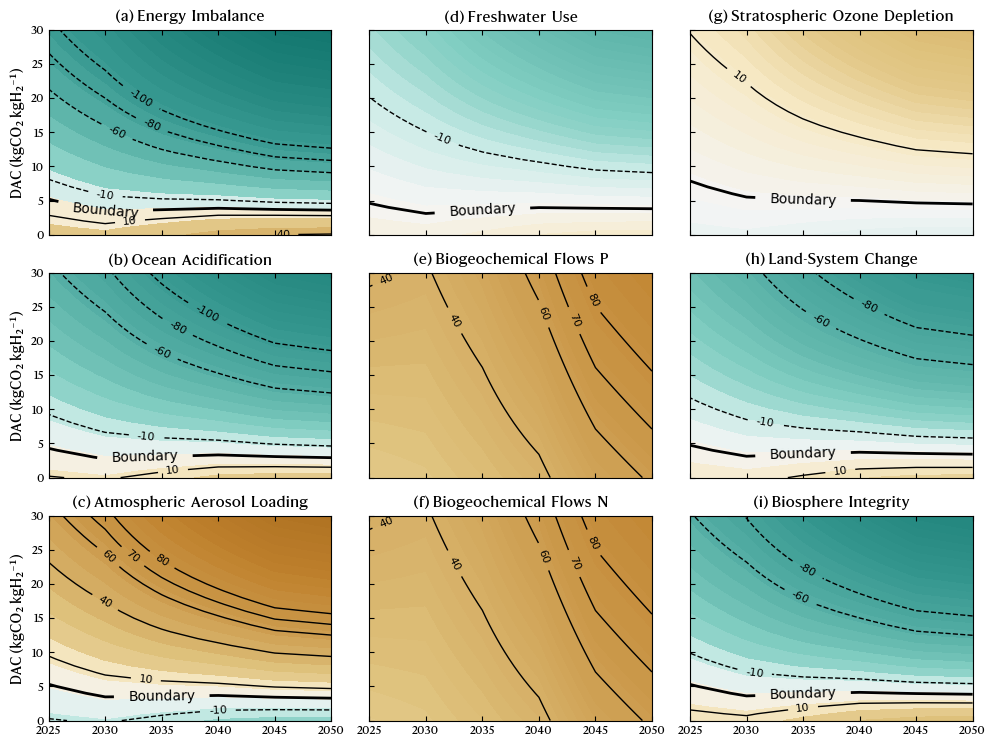

In [24]:
Fig5(interactions = true, full_electrolysis = false, full_biomass = false, full_fossil_ccs = false, q=0.95,renewables=true)


## Hydrogen leakage sensitivities

In [ ]:
# Fig7(q=0.95,Rangedac=3.8:0.5:5.8)


In [ ]:

# Sfig11(fullset,impact_selection=nothing)


In [ ]:
Sfig10()
